In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [194]:
def plot_gpa_histogram(df):
    """
    Creates a histogram showing the distribution of GPA, with annotations.
    """
    
    plt.figure(dpi=144)
    plt.hist(df["GPA"], bins=17, color = 'skyblue', edgecolor='black', alpha=0.7)

    # Calculate statistics
    mean_gpa = df["GPA"].mean()
    std_gpa = df["GPA"].std()
    kurtosis = df["GPA"].kurtosis()
    skewness = df["GPA"].skew()

     # Annotate mean (μ) in the top left
    plt.text(0.05, 0.95, f'$\mu$: {mean_gpa:.2f}', transform=plt.gca().transAxes, 
             horizontalalignment='left', fontsize=10, color='black')

    # Annotate standard deviation (σ) in the top left
    plt.text(0.05, 0.90, f'$\sigma$: {std_gpa:.2f}', transform=plt.gca().transAxes, 
             horizontalalignment='left', fontsize=10, color='black')

    #  Annotate kurtosis in the top left
    plt.text(0.05, 0.85, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, 
             fontsize=10, verticalalignment='top', color='black')

    # Annotate skewness in the top left
    plt.text(0.05, 0.80, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', color='black')

    
    #Adds the title and x, y labels
    plt.title("Distribution of GPA", fontsize=12)
    plt.xlabel("GPA", fontsize=12)
    plt.ylabel("Number of Students", fontsize=12)

    plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/var/folders/_q/r7xlcst50v1b51ntr79cvyc80000gn/T/ipykernel_40190/1231908128.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.text(0.05, 0.95, f'$\mu$: {mean_gpa:.2f}', transform=plt.gca().transAxes,
/var/folders/_q/r7xlcst50v1b51ntr79cvyc80000gn/T/ipykernel_40190/1231908128.py:20: SyntaxWarning: invalid escape sequence '\s'
  plt.text(0.05, 0.90, f'$\sigma$: {std_gpa:.2f}', transform=plt.gca().transAxes,


In [195]:
def plot_study_hours_vs_gpa_with_predictions(df):
    """
    Creates a scatter plot showing the relationship between Study_Hours_Per_Day and GPA,
    including a fitted line, 95% confidence interval, and predicted points with error bars.
    """
    
    # Extract data
    x = df['Study_Hours_Per_Day'].values
    y = df['GPA'].values
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = ss.linregress(x, y)
    
    # Generate fitted line
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = slope * x_fit + intercept
    
    # Degrees of freedom and critical t-value for 95% confidence interval
    n = len(x)  # Number of data points
    t_value = ss.t.ppf(0.975, df=n-2)  # 95% confidence interval
    
    # Standard error of the regression
    residuals = y - (slope * x + intercept)
    residual_std_error = np.sqrt(np.sum(residuals**2) / (n - 2))
    
    # Calculate standard error for the fitted values
    mean_x = np.mean(x)
    se_fit = residual_std_error * np.sqrt(1/n + (x_fit - mean_x)**2 / np.sum((x - mean_x)**2))
    
    # Confidence intervals
    y_fit_upper = y_fit + t_value * se_fit
    y_fit_lower = y_fit - t_value * se_fit
    
    # Predictions with uncertainty
    x_pred = np.array([5.5, 6.5, 7.5, 8.5, 9.5])  # Example prediction points
    y_pred = slope * x_pred + intercept
    se_pred = residual_std_error * np.sqrt(1/n + (x_pred - mean_x)**2 / np.sum((x - mean_x)**2))
    uncertainty_pred = t_value * se_pred  # Margin of error
    
    # Plot data with fitted line and confidence interval
    plt.figure(figsize=(10,6), dpi=144)
    plt.scatter(x, y, alpha=0.4)
    plt.plot(x_fit, y_fit, label=f"Fitted Line: $y = {slope:.2f}x + {intercept:.2f}$", color='red')
    plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color='red', alpha=0.2, label="95% Confidence Interval")
    
    # Add predictions with error bars
    plt.errorbar(x_pred, y_pred, yerr=uncertainty_pred, fmt='o', color='blue', ecolor='blue', elinewidth=2, capsize=4, label="Predicted Points with Error Bars"
                )
    
    # Add labels and legend
    plt.title("Study Hours Per Day vs GPA with Predictions and 95% Confidence Interval")
    plt.xlabel("Study Hours Per Day")
    plt.ylabel("GPA")
    plt.legend(loc='best')
    
    plt.show()

In [196]:
def plot_gpa_boxplot_by_stress(df):
    """
    Creates a box plot showing GPA distribution grouped by Stress_Level.
    """
    
    plt.figure(dpi=144)

    order = ["Low", "Moderate", "High"]
    sns.boxplot(x='Stress_Level', y='GPA', data=df, palette='pastel', order=order)
    plt.title("GPA Distribution by Stress Level")
    plt.xlabel("Stress Level")
    plt.ylabel("GPA")

    plt.show()

In [197]:
def plot_elbow_and_silhouette(X_scaled, k_range=range(2, 10)):
    """
    Plots the Elbow Method and Silhouette Scores using the fig, ax method.
    """
    
    inertia = []
    silhouette_scores = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), dpi=144)

    # Plot Elbow Method
    ax[0].plot(k_range, inertia, marker='o')
    ax[0].set_title("Elbow Method for Optimal k", fontsize=14)
    ax[0].set_xlabel("Number of Clusters (k)", fontsize=14)
    ax[0].set_ylabel("Inertia", fontsize=14)

    # Plot Silhouette Scores
    ax[1].plot(k_range, silhouette_scores, marker='o', color='red')
    ax[1].set_title("Silhouette Scores for Different k", fontsize=14)
    ax[1].set_xlabel("Number of Clusters (k)", fontsize=14)
    ax[1].set_ylabel("Average Silhouette Score", fontsize=14)

    plt.tight_layout()
    plt.show()

In [198]:
def plot_kmeans_clustering(student_df, new_points_data, optimal_k=4):
    """
    Plots scatter graph of Physical Activity Hours Per Day vs GPA and applies K-means clustering, with centroids, clusters, new data points annotated
    """
    
    # Select features
    features = ['Physical_Activity_Hours_Per_Day', 'GPA']
    X = student_df[features]

    # Normalize data
    X_scaled = (X - X.min()) / (X.max() - X.min())

    # Determine optimal number of clusters using Elbow Method and Silhouette Score
    inertia = []
    silhouette_scores = []
    k_range = range(2, 10)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

    # Apply K-means with optimal k 
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    student_df['Cluster'] = kmeans.fit_predict(X_scaled)

    # Back-scale centroids for visualization
    centroids = kmeans.cluster_centers_
    centroids_backscaled = centroids * (X.max().values - X.min().values) + X.min().values

    # New points to be predicted
    new_points = pd.DataFrame(new_points_data)
    new_points_scaled = (new_points - X.min()) / (X.max() - X.min())
    new_clusters = kmeans.predict(new_points_scaled)

    # Add new points to the plot
    plt.figure(figsize=(10, 6), dpi=144)
    sns.scatterplot(x=student_df['Physical_Activity_Hours_Per_Day'], y=student_df['GPA'], hue=student_df['Cluster'], palette='Set1', s=100)
    for i, centroid in enumerate(centroids_backscaled):
        plt.scatter(centroid[0], centroid[1], c='black', marker='X', s=200, label=f'Center {i}')
    plt.scatter(new_points['Physical_Activity_Hours_Per_Day'], new_points['GPA'], c='orange', marker='D', s=150, label='New Points')
    plt.title("Clustering of Physical Activity and GPA with New Data Points Highlighted")
    plt.xlabel("Physical Activity Hours Per Day")
    plt.ylabel("GPA")
    plt.legend(title="Clusters", loc="upper right")
    
    plt.show()

In [199]:
student_df = pd.read_csv("student_lifestyle_dataset.csv")

In [200]:
student_df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


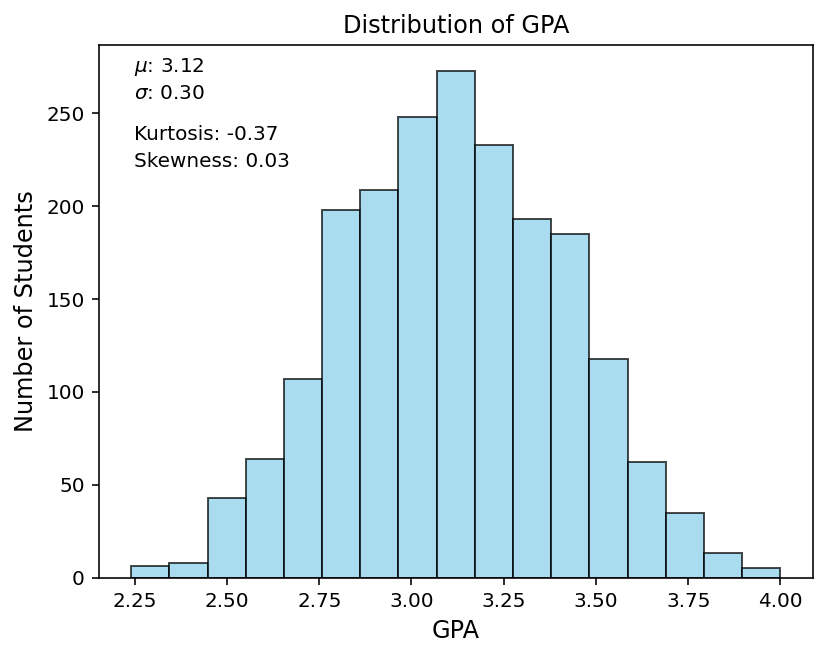

In [201]:
plot_gpa_histogram(student_df)

In [202]:
student_df['Study_Hours_Per_Day'].corr(student_df['GPA'])

0.7344679806560515

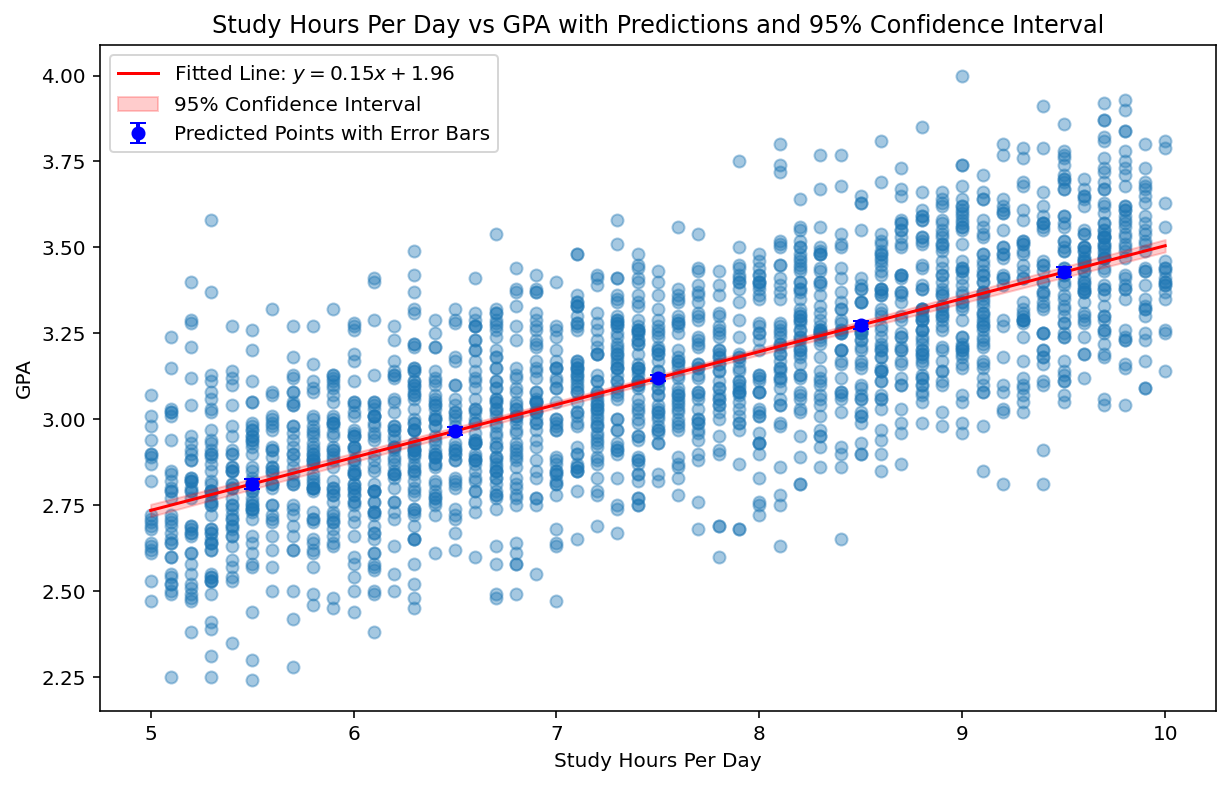

In [203]:
plot_study_hours_vs_gpa_with_predictions(student_df)

/var/folders/_q/r7xlcst50v1b51ntr79cvyc80000gn/T/ipykernel_40190/186541842.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stress_Level', y='GPA', data=df, palette='pastel', order=order)


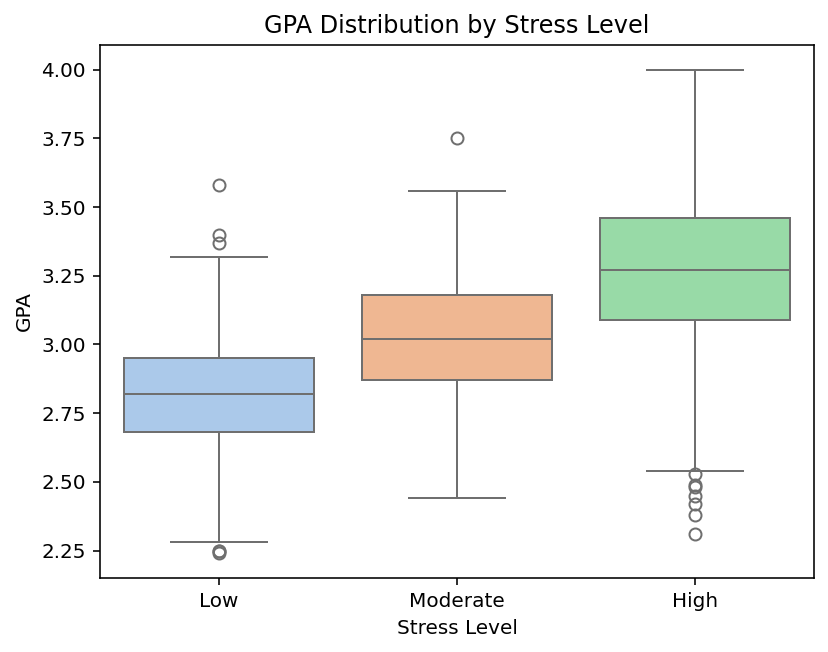

In [204]:
plot_gpa_boxplot_by_stress(student_df)

In [205]:
# Calculate the median and IQR for each stress level
grouped = student_df.groupby('Stress_Level')['GPA']

# Define the order of the categories
stress_levels = ["Low", "Moderate", "High"]

# Initialize results
results = []
for stress_level in stress_levels:
    gpa_values = grouped.get_group(stress_level)
    median = np.median(gpa_values)
    q1 = np.percentile(gpa_values, 25)
    q3 = np.percentile(gpa_values, 75)
    iqr = q3 - q1
    results.append({'Stress Level': stress_level, 'Median GPA': median, 'IQR': iqr})

# Convert results to DataFrame and display
median_iqr_df = pd.DataFrame(results)
print(median_iqr_df)

  Stress Level  Median GPA   IQR
0          Low        2.82  0.27
1     Moderate        3.02  0.31
2         High        3.27  0.37


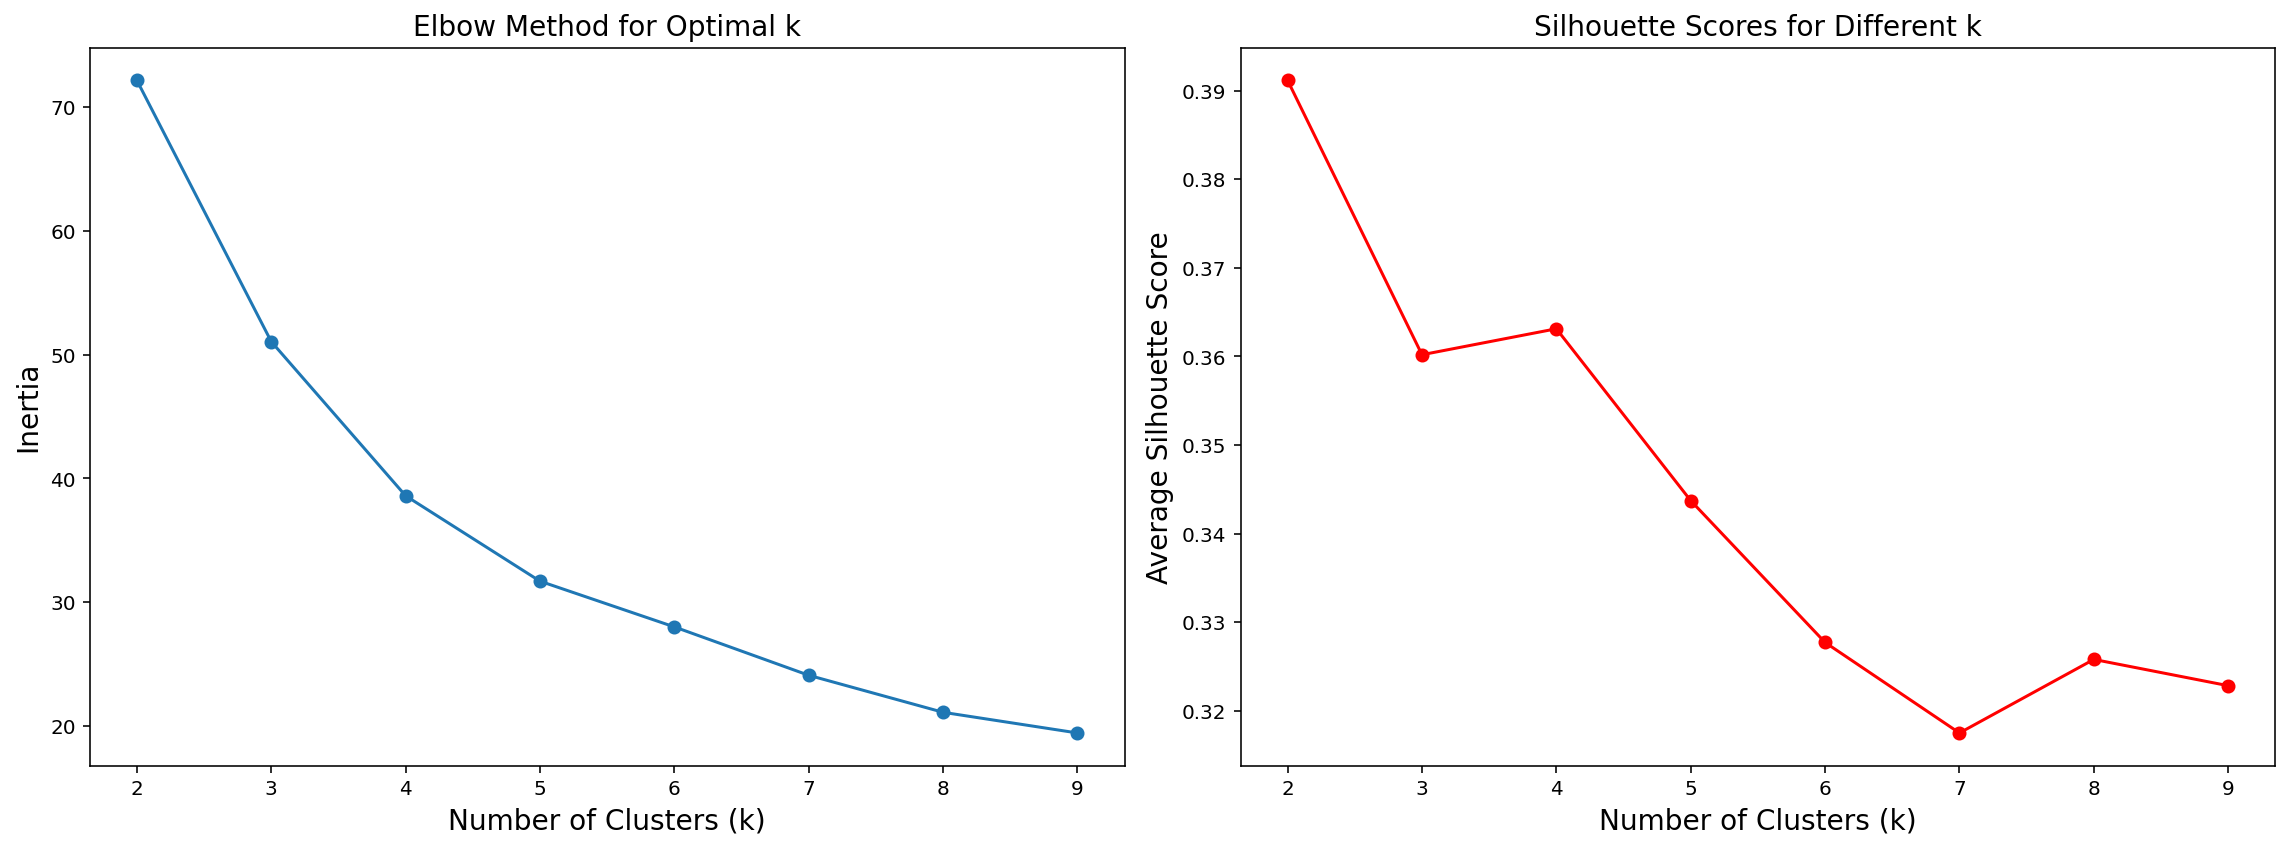

In [206]:
plot_elbow_and_silhouette(X_scaled, k_range=range(2, 10))

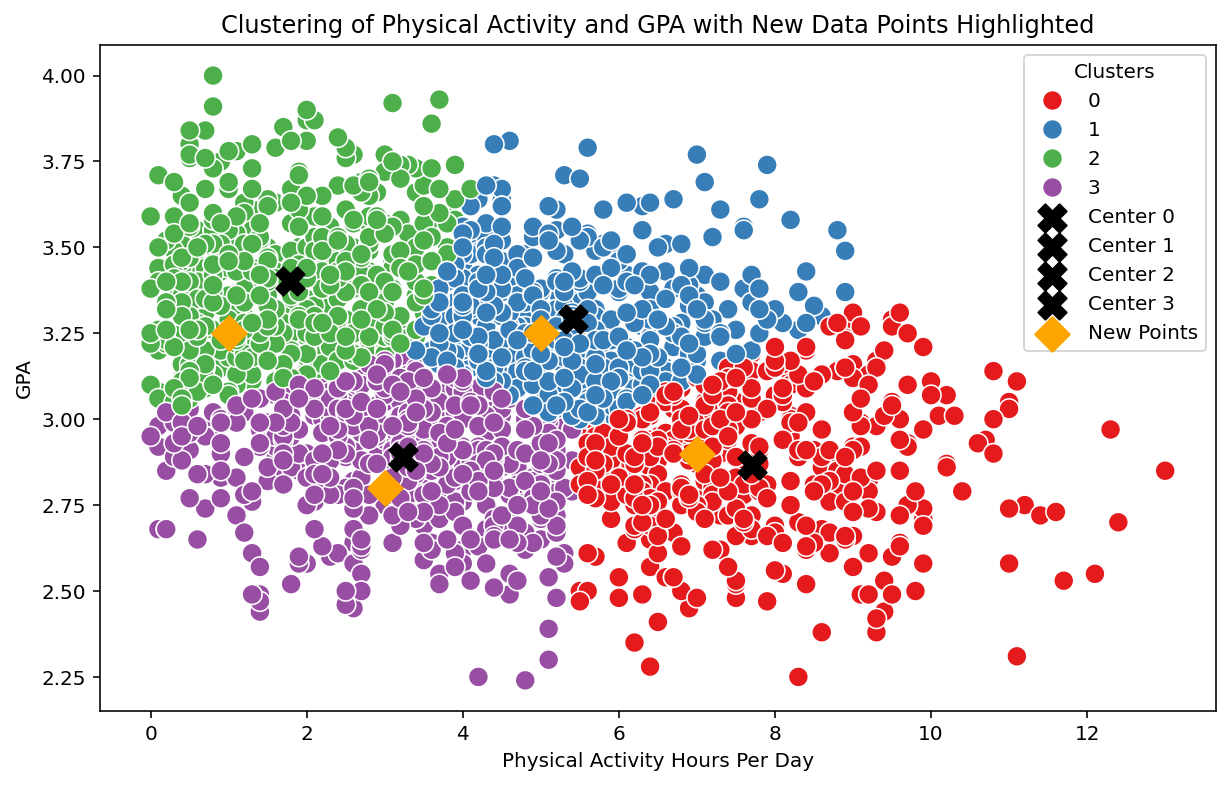

In [207]:
new_points_data = {'Physical_Activity_Hours_Per_Day': [1, 3, 5, 7], 'GPA': [3.25, 2.80, 3.25, 2.9]}


plot_kmeans_clustering(student_df, new_points_data)

In [208]:
student_df['Physical_Activity_Hours_Per_Day'].corr(student_df['GPA'])

-0.34115246400996196